# Guided Project: Classifying Heart Disease

Solution notebook can be referenced [here](https://github.com/dataquestio/solutions/blob/master/Mission735Solutions.ipynb).

## Introduction

We'll be looking at a real-life dataset: the *Heart Disease Data Set* from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). 

This dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual. This a prime example of how machine learning can help solve problems that have a real impact on people's lives.`

In [1]:
## setup

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Exploring the Dataset

In [3]:
## Check for missing values - no apparent ones

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [4]:
heart.describe(include = 'all')

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,1.000000


In [5]:
heart.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

From the source of the data set we found the documentation of each variable:

* `age`: age in years
* `sex`: sex (1 = male; 0 = female)
* `cp`: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
* `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
* `chol`: serum cholestoral in mg/dl
* `fbs`: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* `restecg`: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
* `thalach`: maximum heart rate achieved
* `exang`: exercise induced angina (1 = yes; 0 = no)
* `oldpeak`:ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping, 'ca', 'thal', 'present'
* `ca`: number of major vessels (0-3) colored by flourosopy
* `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect
* `present`: target variable, encodes the absence of any heart disease, while 1 encodes the presence

We observed that:

* `Unnamed: 0` appeared to be a ID-like column but we were unsure of its exact meaning. We should just drop it.
* Certain columns that were encoded in integers shall be treated as categorical instead of numerical, like `sex, cp, fbs, restecg, exang, slope, ca, thal`.
* Values stored in `ca` and `thal` should be converted to a numerical type. 

### Cleaning Data Type

In [6]:
heart['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [7]:
## Change ? to NA then convert ca to numerical

heart['ca'] = heart['ca'].apply(lambda x: np.nan if x == '?' else x)
heart['ca'].value_counts(dropna = False)

0.0    176
1.0     65
2.0     38
3.0     20
NaN      4
Name: ca, dtype: int64

In [8]:
heart['ca'] = heart['ca'].astype(np.float64)

In [9]:
heart['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [10]:
## Change ? to NA then convert thal to numerical

heart['thal'] = heart['thal'].apply(lambda x: np.nan if x == '?' else x)
heart['thal'].value_counts(dropna = False)

3.0    166
7.0    117
6.0     18
NaN      2
Name: thal, dtype: int64

In [11]:
heart['thal'] = heart['thal'].astype(np.float64)

### Drop Missing Values & Unnecessary Columns

In [12]:
## Drop Unnamed

heart = heart.drop('Unnamed: 0', axis = 1)
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

In [13]:
## Drop missing values for ca & thal, then convert both to integers

heart = heart[(heart.ca.notnull()) & (heart.thal.notnull())]
heart[['ca', 'thal']] = heart[['ca', 'thal']].astype(np.int64)

heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  present   297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [14]:
## Divide features into categorical vs. numerical

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [15]:
## Check distribution of y - classes are quite balanced

heart['present'].value_counts(normalize = True)

0    0.538721
1    0.461279
Name: present, dtype: float64

### Explore Categorical Features

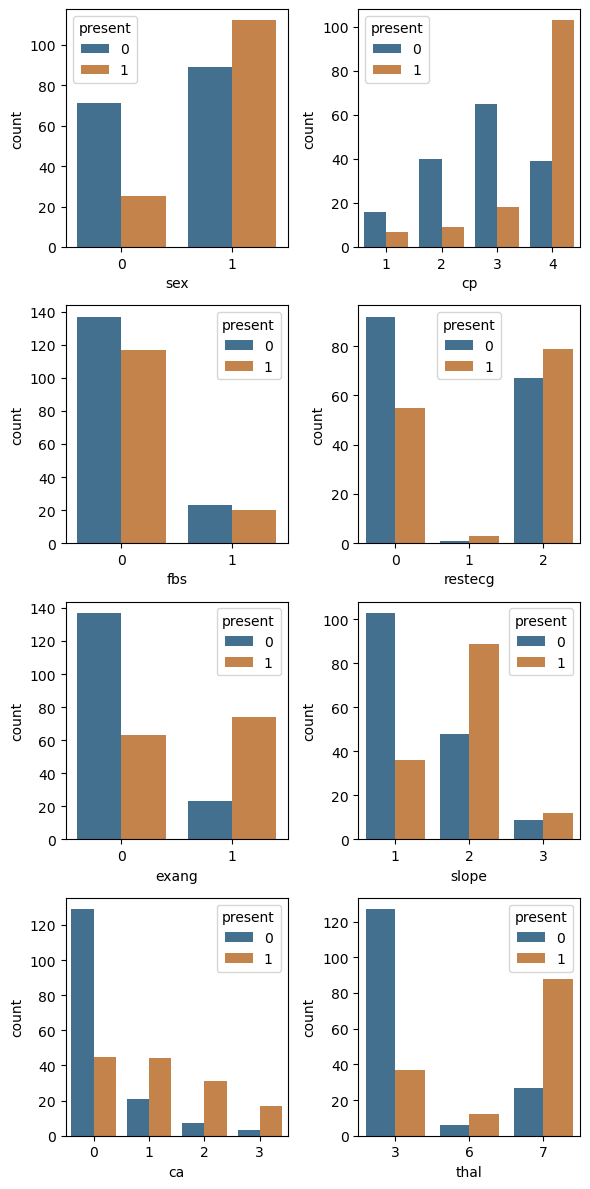

In [16]:
plt.figure(figsize = (6,12))

for i, feature in enumerate(categorical_features):
    
    plt.subplot(4,2,i+1)
    sns.countplot(data = heart, x = feature, hue = 'present', saturation = 0.5)

plt.tight_layout()

In [17]:
heart.groupby('present')[categorical_features].mean()

,sex,cp,fbs,restecg,exang,slope,ca,thal
present,,,,,,,,
0,0.556250,2.793750,0.143750,0.843750,0.143750,1.412500,0.275000,3.787500
1,0.817518,3.583942,0.145985,1.175182,0.540146,1.824818,1.145985,5.832117


Consistent with the distribution of heart disease occurrence in the bar plot, it seemed that only `fbs` did not affect the distribution of heart disease as much, and thus will be excluded in the model.

In [18]:
categorical_features.remove('fbs')
categorical_features

['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

### Explore Numerical Features

<AxesSubplot:>

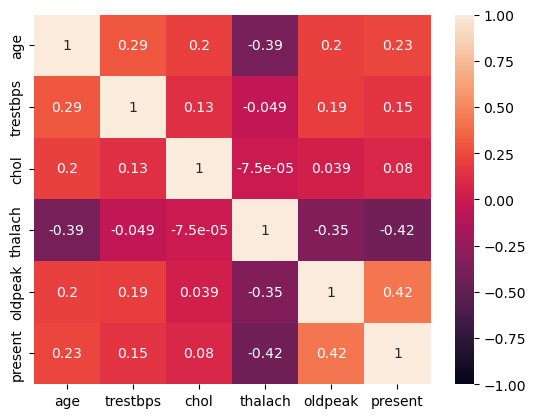

In [19]:
corrs = heart[numerical_features + ['present']].corr()

sns.heatmap(corrs, vmin = -1, vmax = 1, annot = True)

In [20]:
heart.groupby('present')[numerical_features].mean()

,age,trestbps,chol,thalach,oldpeak
present,,,,,
0,52.643750,129.175000,243.493750,158.581250,0.598750
1,56.759124,134.635036,251.854015,139.109489,1.589051


The `chol` column was found not strongly correlated with the target variable so we will exclude it from the model as well. 

In [21]:
numerical_features.remove('chol')
numerical_features

['age', 'trestbps', 'thalach', 'oldpeak']

## Dividing the Data

In [22]:
## Add dummies for categorical features

X = heart[categorical_features + numerical_features]
y = heart.present

X.head()

,sex,cp,restecg,exang,slope,ca,thal,age,trestbps,thalach,oldpeak
0,1,1,2,0,3,0,6,63,145,150,2.3
1,1,4,2,1,2,3,3,67,160,108,1.5
2,1,4,2,1,2,2,7,67,120,129,2.6
3,1,3,0,0,3,0,3,37,130,187,3.5
4,0,2,2,0,1,0,3,41,130,172,1.4


In [23]:
X = pd.get_dummies(X, columns = categorical_features, drop_first = True)
X.head()

,age,trestbps,thalach,oldpeak,sex_1,cp_2,cp_3,cp_4,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1,ca_2,ca_3,thal_6,thal_7
0,63,145,150,2.3,1,0,0,0,0,1,0,0,1,0,0,0,1,0
1,67,160,108,1.5,1,0,0,1,0,1,1,1,0,0,0,1,0,0
2,67,120,129,2.6,1,0,0,1,0,1,1,1,0,0,1,0,0,1
3,37,130,187,3.5,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,41,130,172,1.4,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [24]:
## Use a 80/20 train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(f'Train size: {X_train.shape[0]}\nTest size: {X_test.shape[0]}')

Train size: 237
Test size: 60


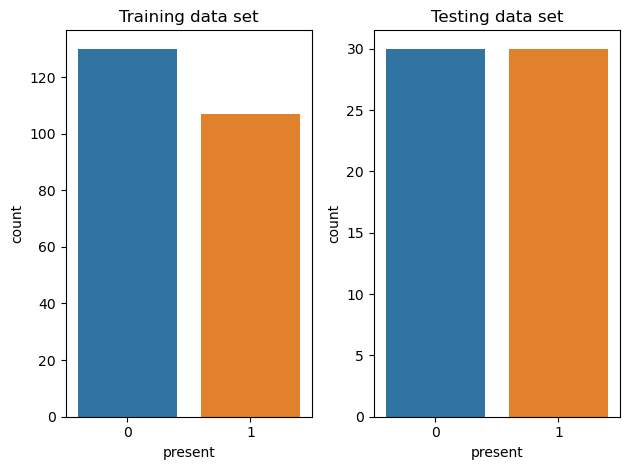

In [25]:
## Check distribution of y

plt.subplot(1,2,1)
sns.countplot(data = y_train, x = y_train)
plt.title('Training data set')

plt.subplot(1,2,2)
sns.countplot(data = y_test, x = y_test)
plt.title('Testing data set')

plt.tight_layout()

## Building the Model

In [26]:
clf = LogisticRegression(penalty = 'none', max_iter = 1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [27]:
accucracy = clf.score(X_train, y_train)
print(f'Accucracy {accucracy :.4%}')

Accucracy 88.6076%


In [28]:
pred = clf.predict(X_train)

tp = sum((y_train == pred) & (pred == 1))
tn = sum((y_train == pred) & (pred == 0))
fp = sum((y_train != pred) & (pred == 1))
fn = sum((y_train != pred) & (pred == 0))

sensitivity = tp/(tp + fn)
specificity = tn/(tn + fp)

print(f'Sensitivity: {sensitivity :.4%}\nSpecificity: {specificity :.4%}')

Sensitivity: 83.1776%
Specificity: 93.0769%


In [29]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       130
           1       0.91      0.83      0.87       107

    accuracy                           0.89       237
   macro avg       0.89      0.88      0.88       237
weighted avg       0.89      0.89      0.89       237



In [30]:
print(clf.classes_)
print()
print(confusion_matrix(y_train, pred))

[0 1]

[[121   9]
 [ 18  89]]


## Interpreting the Model Coefficients

In [31]:
X_train.columns

Index(['age', 'trestbps', 'thalach', 'oldpeak', 'sex_1', 'cp_2', 'cp_3',
       'cp_4', 'restecg_1', 'restecg_2', 'exang_1', 'slope_2', 'slope_3',
       'ca_1', 'ca_2', 'ca_3', 'thal_6', 'thal_7'],
      dtype='object')

In [32]:
print(f'Intercept: {clf.intercept_}\n\nCoeffcients: {clf.coef_}')

Intercept: [-3.80144379]

Coeffcients: [[-0.0245228   0.03141246 -0.0249548   0.64580641  1.4371537   0.34568712
  -0.34307995  1.63113235  0.72516581  0.75921734  0.46741009  0.75622523
   0.5783992   1.94996146  2.8555834   2.2898359  -1.4054825   1.40351017]]


## Final Model Evaluation

In [33]:
accucracy = clf.score(X_test, y_test)
print(f'Accucracy {accucracy :.4%}')

Accucracy 81.6667%


In [34]:
pred_test = clf.predict(X_test)

tp = sum((y_test == pred_test) & (pred_test == 1))
tn = sum((y_test == pred_test) & (pred_test == 0))
fp = sum((y_test != pred_test) & (pred_test == 1))
fn = sum((y_test != pred_test) & (pred_test == 0))

sensitivity = tp/(tp + fn)
specificity = tn/(tn + fp)

print(f'Sensitivity: {sensitivity :.4%}\nSpecificity: {specificity :.4%}')

Sensitivity: 80.0000%
Specificity: 83.3333%


In [35]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.83      0.80      0.81        30

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [36]:
print(clf.classes_)
print()
print(confusion_matrix(y_test, pred_test))

[0 1]

[[25  5]
 [ 6 24]]


A somewhat lower accuracy for the testing data set could indicate some overfitting, as a result of including all categorical features by adding dummies.